In [22]:
import numpy as np

import matplotlib.pyplot as plt

import sys
sys.path.append('../')

from LocalImprove import x_local_improve
from RKHS import GPMI

from Algorithms import incremental_greedy

from functools import partial


import pickle as pkl

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Experiment parameters

In [2]:
T = 10

c = 1
l = 1
var_0 = 0.01


search_region_center = np.array([0.,0.])
search_region_radius = 10
step_size = 1

# The reference system.
ref = np.array([[0,0]]) # A single point reference set.
R = np.array([search_region_radius*np.ones(T)]).T
R[0,0] = 0

N = len(ref)

x0 = search_region_center

# Callables

In [3]:
x_objective = partial(GPMI,c=c,l=l,var_0=var_0)

# x local improvement

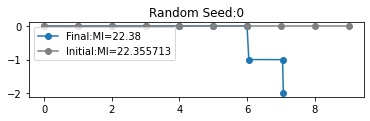

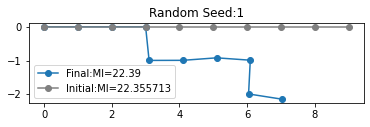

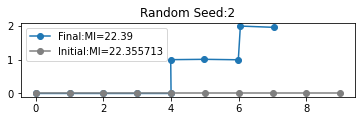

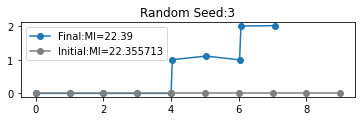

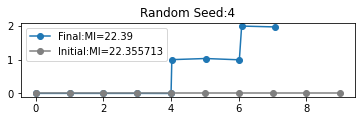

In [20]:
straight_line = step_size*np.array([np.arange(T),np.zeros(T)]).T+x0

iniMI = x_objective(np.array([straight_line]))[0]

n_pass = 20


for seed in range(5):
    
    x = straight_line
    np.random.seed(seed)

    for _ in range(n_pass):
#         print('curr objective',x_objective(np.array([x]))[0])
        x_best = x_local_improve(x,x_objective,step_size,ref,R,x0,reverse_order=True)
#         print('diff',np.linalg.norm(x_best-x))
    #     if np.linalg.norm(x_best-x) == 0:
    #         break
        x = x_best

    MI = x_objective(np.array([x]))[0]
    plt.plot(x[:,0],x[:,1],marker='o',label='Final:MI={:.2f}'.format(MI))
    plt.plot(straight_line[:,0],straight_line[:,1],marker='o',label = 'Initial:MI={:2f}'.format(iniMI),color = 'grey')

    plt.title("Random Seed:{}".format(seed))
    # plt.ylim((-5,5))
    # plt.xlim((-5,5))

    plt.legend()
    plt.gca().set_aspect('equal')
    plt.show()

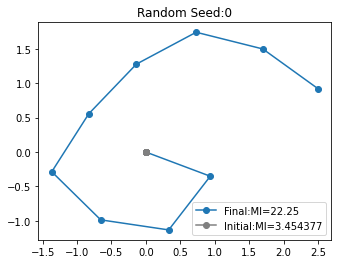

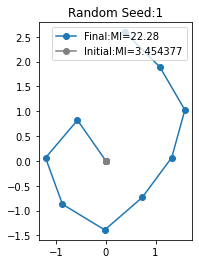

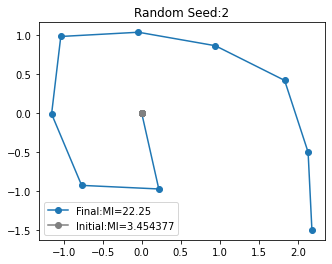

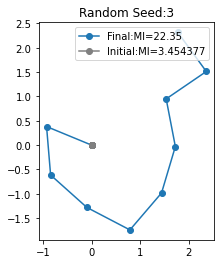

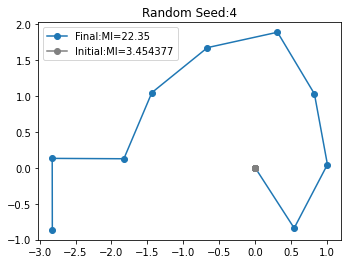

In [21]:
zero = step_size*np.zeros((T,2))


n_pass = 5

iniMI = x_objective(np.array([zero]))[0]

for seed in range(5):
    
    x = zero
    np.random.seed(seed)

    for _ in range(n_pass):
#         print('curr objective',x_objective(np.array([x]))[0])
        x_best = x_local_improve(x,x_objective,step_size,ref,R,x0,reverse_order=True)
#         print('diff',np.linalg.norm(x_best-x))
    #     if np.linalg.norm(x_best-x) == 0:
    #         break
        x = x_best

    MI = x_objective(np.array([x]))[0]
    plt.plot(x[:,0],x[:,1],marker='o',label='Final:MI={:.2f}'.format(MI))
    plt.plot(zero[:,0],zero[:,1],marker='o',label = 'Initial:MI={:2f}'.format(iniMI),color = 'grey')
    plt.title("Random Seed:{}".format(seed))
    # plt.ylim((-5,5))
    # plt.xlim((-5,5))
    plt.legend()
    plt.gca().set_aspect('equal')
    plt.show()

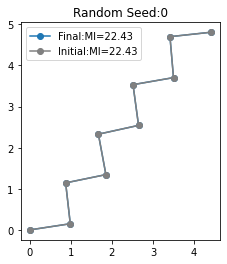

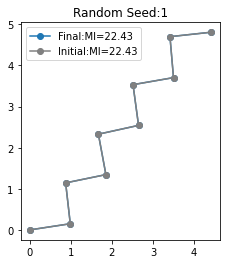

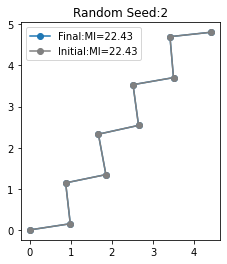

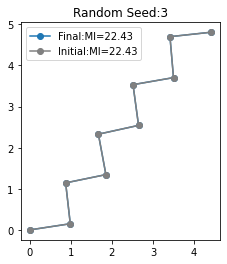

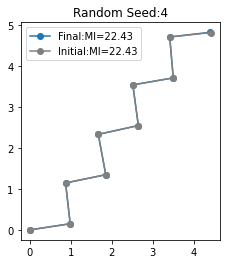

In [34]:
from RKHS import k

kernel = partial(k,c=c,l=l)
greedy = incremental_greedy(kernel,x0,step_size,ref,R,T,var_0,c)


n_pass = 5

iniMI = x_objective(np.array([greedy]))[0]

for seed in range(5):
    
    x = greedy
    np.random.seed(seed)

    for _ in range(n_pass):
#         print('curr objective',x_objective(np.array([x]))[0])
        x_best = x_local_improve(x,x_objective,step_size,ref,R,x0,reverse_order=True)
#         print('diff',np.linalg.norm(x_best-x))
    #     if np.linalg.norm(x_best-x) == 0:
    #         break
        x = x_best

    MI = x_objective(np.array([x]))[0]
    plt.plot(x[:,0],x[:,1],marker='o',label='Final:MI={:.2f}'.format(MI))
    plt.plot(greedy[:,0],greedy[:,1],marker='o',label = 'Initial:MI={:.2f}'.format(iniMI),color = 'grey')
    plt.title("Random Seed:{}".format(seed))
    # plt.ylim((-5,5))
    # plt.xlim((-5,5))
    plt.legend()
    plt.gca().set_aspect('equal')
    plt.show()